


# **Predicting the   retail customer retention potential level as high/medium/low AND Customer Segmentation & Pattern Extraction**


It is important for any retail company to focus on customer though continuous engagement which translates to increased sales and resultant profitability measured over a period. The customer churn results in not just loss of potential revenue and future profits together with sunk acquisition costs but also negative publicity and incurrence of additional cost of new acquisitions.

On the other hand, Customer focus leads to retention which in turn leads to generation of value, not just volumes. Thus, understanding of customer churn and the underlying factors is central to customer relationship management.

Retailers develop metric to capture customer response towards the product, service, price and competition so that they offer better products and service delivery to customers in comparison with competition. In retail business, a customer is treated as churned once his/her transactions/interactions/visits outdate a particular amount of time. It happens when the product/service is no more used or he uses a product/service of competitor. It is useful to understand defected customer in terms of interests and preferences  to win them back.

It is possible to understand the customer based on historical data of customers containing the characteristics of customers, their transactions, the interactions with them  etc. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement. To ensure that such marketing spend is appropriately directed to the customers likely to be retained and/or with high probability of retention, you are required to classify the retention potential of customer as High/Medium/Low.


You are expected to classify each customer  as high/medium/low under the target attribute “RententionPotential”. Here identifying the medium level customers is important as this category  indicates where some intelligent action may lead to high possibility of retaining the customers who are likely to churn.

You are also required to segment the customers from the standpoint of customer retention for strategic purposes and extract the top 5 patterns for each level in target attribute, while answering other questions too cited below.

**Objectives, In this hackathon, you are expected**

1. to do exploratory Data Analysis using visualizations
2. to build the analytical framework to predict the retail customer retention potential level as high/medium/low 
3. to  segment the customers into different  categories from the standpoint of customer retention which will be used for strategic purposes
4. to extract the top 5 patterns for each level in the target attribute


# **About Data:**

Data consists of  the  transactions made by the customers, emails sent to the customers and customers profile along with their preferences given during registration etc. 
Target attribute : RetentionPotential

# ***Details of the datasets:***


**Data consists of :**


         a.  the transactions made by the customers, with the details of  Customer ID, date of order, quantity etc.  
         b.  the emails sent to the customers, with the details of Customer ID, email date, time stamp, email type etc  
         c.  Customers profile and preferences data, with the details of Customer ID, City, date of registration etc 


**I. Datasets with  customer id & the target attribute(RetentionPotential) :**

      a.     Train.xlsx
      b .     Test.xlsx  ( The target attribute RetentionPotential is not available as it has to be predicted)
        Note:  Use Train.xlsx  for doing the cluster analysis and use  Test.xlsx  for assigning the segment to the new  Customer. (Note : Use train dataset for cluster analysis,  removing the target attribute RetentionPotential)



**II. Other datasets:**

        a. Train
              i.   transactionsdata_Train.xlsx
              ii.  Emaildata_Train.xlsx
              iii.  Customerdata_Train.xlsx
        b.  Test
              i.   transactionsdata_Test.xlsx
              ii.  Emaildata_Test.xlsx
              iii.  Customerdata_Test.xlsx


 **III.  Hint:**

  You may explore further to understand the domain and to do the feature engineering to handle the prediction task . Feature Engineering is important to do the tasks efficiently. 

# ***Main Tasks:***



1.      Exploratory Data Analysis using visualizations in R Notebook or Jupiter notebook format . (All train related datasets should be used for this )
             a.  What kind of insights did you find in the data after feature engineering?
             b.  Learning curves : what is your observation based on the learning curves? Is there any bias or variance problem in the data or none? How do you address this bias/variance issue in the data?
             c.  Based on the learning curves observation, which model do you think is suitable for the data and why?  
	


2.   You are expected to build a framework that predicts each customer as high / medium / low under the target attribute RetentionPotential
        a.  For this purpose you may use traditional approaches and deep learning techniques as well to improve the accuracies on prediction.


3.    You are expected to do the customer segmentation on train data and assign appropriate segments to the  customers in test dataset.  (Note : Use train datasets for this task removing the target attribute ‘RetentionPotential’)


4.     Patterns and suggestions to the company :  You are expected to extract top 5 patterns for each level in target attribute using any decision tree algorithm and explain on what basis did you rank the rules and what rules would you suggest to the company to improve it’s ROI.

#  ***Error Metrics***

Consider the **‘recall’**  for the class level **"medium”** of Target attribute **"RetentionPotential”**  as error metric and tune the model accordingly.



**Important Note for the results submission:**  

**Note:** 

While evaluating the predictions submitted, the system will consider “1” as positive  level in target attribute and hence please convert the target attribute accordingly and submit the results. It is very important for this problem as the error metic is “recall” for the target attribute level “medium”.  Refer to the samplesubmission.csv file.

**-------------------------------------------------------------------------------------------------------------------------------**


# **Importing Dependencies**

In [1]:
import os
import pandas as pd     #importiing pandas library 
import numpy as np      #importing numpy library
import matplotlib.pyplot as plt   #importing matplotlib for visualizatona and plotting    
import seaborn as sns           #importing matplotlib for visualizatona and plotting  


In [2]:
## to avoid any wornings appering while executing
import warnings
warnings.filterwarnings('ignore')


**------------------------------------------------------------------------------------------------------------------------------**

# **Reading data**

In [3]:
##reading data file 
cust = pd.read_excel(r'C:\Users\saipr\Downloads\TrainData\Customerdata_Train.xlsx',na_values=['#','?',',','*'])
email = pd.read_excel(r'C:\Users\saipr\Downloads\TrainData\Emaildata_Train.xlsx',na_values=['#','?',',','*'])
train = pd.read_excel(r'C:\Users\saipr\Downloads\TrainData\Train.xlsx',na_values=['#','?',',','*'])
trans = pd.read_excel(r'C:\Users\saipr\Downloads\TrainData\transactionsdata_Train.xlsx',na_values=['#','?',',','*'])


**Checking shape**


In [4]:
print(cust.shape)   
print(email.shape)      
print(trans.shape)
print(train.shape)

(23820, 7)
(517672, 6)
(104755, 4)
(23820, 2)


**sorting according to customerID**

In [5]:
#cust = cust.sort_values("CustomerID", ascending=True)

In [6]:
#email = email.sort_values("CustomerID", ascending=True)

In [7]:
#trans = trans.sort_values("CustomerID", ascending=True)

In [8]:
#train = train.sort_values("CustomerID", ascending=True)

In [9]:
cust.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [10]:
cust.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [11]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [12]:
email.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [13]:
email.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [14]:
email['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [15]:
trans.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [16]:
trans.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [17]:
train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [18]:
train.dtypes

CustomerID            object
RetentionPotential    object
dtype: object

# **Preprocessing data**

**Extracting year form DateOfRegistration**

In [19]:
cust['DateOfRegistration'] = pd.to_datetime(cust['DateOfRegistration'])
cust['yearofreg'] = cust['DateOfRegistration'].apply(lambda x:x.year)

In [20]:
cust

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009
...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday,2018
23816,C12197,CITY3,2018-01-17,1,0,1,Friday,2018
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday,2018
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018


In [21]:
cust.drop('DateOfRegistration', axis=1, inplace=True)

In [22]:
cust

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg
0,C16368,CITY2,0,0,0,Monday,2012
1,C20345,CITY2,1,1,1,Friday,2010
2,C17683,CITY2,0,0,0,Wednesday,2010
3,C18647,CITY4,0,0,0,Monday,2010
4,C36692,CITY2,1,1,0,Friday,2009
...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,2018
23816,C12197,CITY3,1,0,1,Friday,2018
23817,C40967,CITY3,1,0,0,Saturday,2018
23818,C36140,CITY3,1,1,0,Saturday,2018


In [23]:
cust.dtypes

CustomerID              object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
yearofreg                int64
dtype: object

**Extracting year form DateOfEmail**

In [24]:
email['DateOfemail'] = pd.to_datetime(email['DateOfemail'])
email['yearofemail'] = email['DateOfemail'].apply(lambda x:x.year)

In [25]:
email

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,yearofemail
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009
...,...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes,2018
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no,2018
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018


In [26]:
email.drop(['DateOfemail','timestamp'], axis=1, inplace=True)

In [27]:
email

,CustomerID,EmailType,MailOpened,MailClicked,yearofemail
0,C16368,WelcomeEmail,yes,NotApplicable,2012
1,C20345,WelcomeEmail,yes,NotApplicable,2010
2,C17683,WelcomeEmail,yes,NotApplicable,2010
3,C18647,WelcomeEmail,yes,NotApplicable,2010
4,C36692,WelcomeEmail,yes,NotApplicable,2009
...,...,...,...,...,...
517667,C36140,CustomizedEmail,yes,yes,2018
517668,C36140,CustomizedEmail,no,no,2018
517669,C36140,CustomizedEmail,yes,yes,2018
517670,C36140,CustomizedEmail,yes,no,2018


In [28]:
email.dtypes

CustomerID     object
EmailType      object
MailOpened     object
MailClicked    object
yearofemail     int64
dtype: object

**Extracting year form DateOfOrder**

In [29]:
trans['DateOfOrder'] = pd.to_datetime(trans['DateOfOrder'])
trans['yearoforder'] = trans['DateOfOrder'].apply(lambda x:x.year)

In [30]:
trans.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,yearoforder
0,C16368,2013-08-11,15:17:52,15,2013
1,C20345,2011-04-01,19:50:00,92,2011
2,C20345,2012-06-29,15:11:56,95,2012
3,C20345,2012-09-22,20:49:10,74,2012
4,C20345,2011-08-23,11:50:26,81,2011


In [31]:
trans.drop(['DateOfOrder','timestamp'], axis=1, inplace=True)

In [32]:
trans

,CustomerID,OrderQuantity,yearoforder
0,C16368,15,2013
1,C20345,92,2011
2,C20345,95,2012
3,C20345,74,2012
4,C20345,81,2011
...,...,...,...
104750,C12197,56,2018
104751,C40967,35,2018
104752,C36140,47,2018
104753,C36140,53,2018


In [33]:
trans.dtypes

CustomerID       object
OrderQuantity     int64
yearoforder       int64
dtype: object

**grouping customerID and year**

In [34]:
email_df=email.groupby(["CustomerID"]).count()

In [35]:
email_df

,EmailType,MailOpened,MailClicked,yearofemail
CustomerID,,,,
C12116,32,32,32,32
C12117,1,1,1,1
C12118,1,1,1,1
C12119,42,42,42,42
C12120,1,1,1,1
...,...,...,...,...
C42185,44,44,44,44
C42186,1,1,1,1
C42187,1,1,1,1


In [36]:
email_df.nunique()

EmailType      84
MailOpened     84
MailClicked    84
yearofemail    84
dtype: int64

In [37]:
trans_df = trans.groupby(["CustomerID"]).sum()

In [38]:
trans_df

,OrderQuantity,yearoforder
CustomerID,,
C12116,115,6039
C12117,41,2013
C12118,41,2013
C12119,52,2013
C12120,31,2014
...,...,...
C42185,1340,26144
C42186,46,2013
C42187,41,2013


In [39]:
cust.shape

(23820, 7)

In [40]:
cust.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'yearofreg'],
      dtype='object')

In [41]:
train.shape

(23820, 2)

In [42]:
train.columns

Index(['CustomerID', 'RetentionPotential'], dtype='object')

In [43]:
email_df.shape

(23820, 4)

In [44]:
email_df.columns

Index(['EmailType', 'MailOpened', 'MailClicked', 'yearofemail'], dtype='object')

In [45]:
trans_df.shape

(23820, 2)

In [46]:
trans_df.columns

Index(['OrderQuantity', 'yearoforder'], dtype='object')

**------------------------------------------------------------------------------------------------------------------------------**

# **Visualisation**

Customer data

Text(0.5, 1.0, 'City vs count')

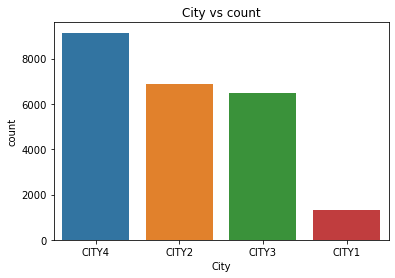

In [47]:
sns.countplot(x="City", data=cust, order=cust["City"].value_counts().index)   
#plotting countplot for City
plt.title('City vs count')

**From the above graph, we can see that there are more number of customers in City 4**

Text(0.5, 1.0, 'PreferredDeliveryDay vs count')

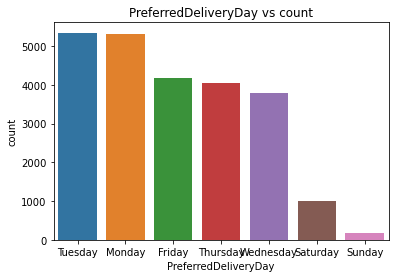

In [48]:
sns.countplot(cust['PreferredDeliveryDay'],order=cust["PreferredDeliveryDay"].value_counts().index)     
#plotting countplot for PreferredDeliveryDay  
plt.title('PreferredDeliveryDay vs count')

**From the above graph, we can see that the preferred day of delivery is Monday and Tuesday**

Text(0.5, 1.0, 'City vs PreferredDelivery')

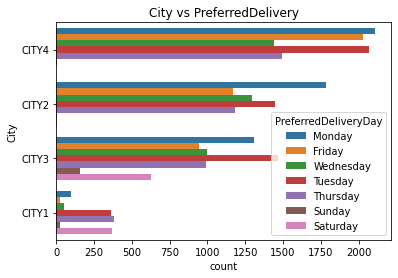

In [49]:
sns.countplot(data=cust, y="City", hue="PreferredDeliveryDay", order=cust["City"].value_counts().index)
#plotting countplot for City vs PreferredDeliveryDay
plt.title('City vs PreferredDelivery')

**From the above graph, we can understand the most of the customers PreferredDeliveryDay is Monday in City4 and City2 and Tuesdday in City3 and thursday in City1**

Text(0.5, 1.0, 'OnlineCommunication vs count')

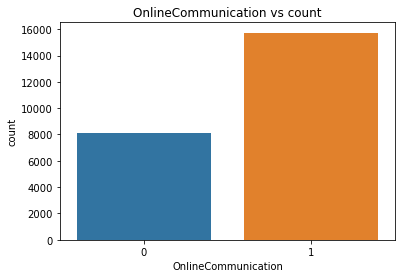

In [50]:
sns.countplot(cust['OnlineCommunication'])
#plotting countplot for OnlinCommunication
plt.title('OnlineCommunication vs count')

**From the graph, we can see that customers prefor online communication mode the most**

Text(0.5, 1.0, 'City vs Online Communication')

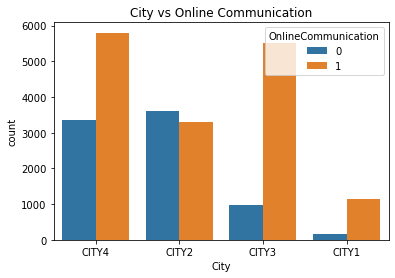

In [51]:
sns.countplot(data=cust, x="City", hue="OnlineCommunication", order=cust["City"].value_counts().index)
#plotting countplot for City vs OnlineCommunication
plt.title('City vs Online Communication')

**From the above graph, we can understand the most of the customers in City4, City3 and City1 opted OnlineCOmmunication and CIty2 didn't opt for OnlineCommunication**

Text(0.5, 1.0, 'AutomaticRefill')

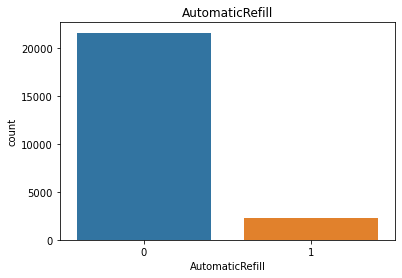

In [52]:
sns.countplot(cust['AutomaticRefill'])
#plotting countplot for AutomaticRefill
plt.title('AutomaticRefill')

**From the above graph, we can say the customers don't prefer AutomaticRefill**

Text(0.5, 1.0, 'City vs AutomaticRefill')

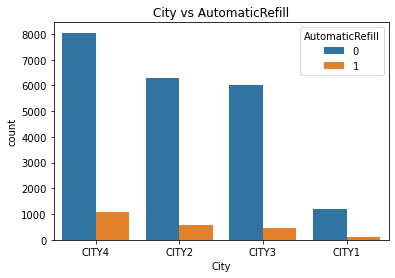

In [53]:
sns.countplot(data=cust, x="City", hue="AutomaticRefill",order=cust["City"].value_counts().index)
#plotting countplot for City vs AutomaticRefill
plt.title('City vs AutomaticRefill')

**From the above graph, we can understand the most of the customers didn't opt AutomaticRefill in any of the City**

Text(0.5, 1.0, 'DoorstepDelivery')

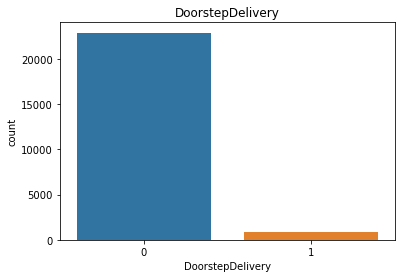

In [54]:
sns.countplot(cust['DoorstepDelivery'])
#plotting countplot for DoorstepDelivery
plt.title('DoorstepDelivery')

**here form the above graph, we can observe that most of the customer sprefer doorstep delivery**

Text(0.5, 1.0, 'OnlineCommunication vs DoorstepDelivery')

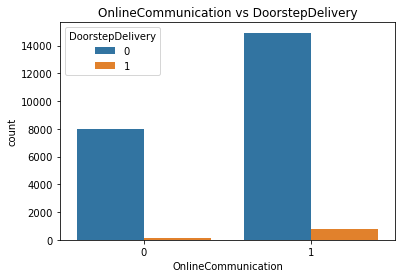

In [55]:
sns.countplot(data=cust, x="OnlineCommunication", hue="DoorstepDelivery")
#plotting countplot for OnlineCommunication vs DoorstepDelivery
plt.title('OnlineCommunication vs DoorstepDelivery')

**From the above plot we can understand the most of the customers didn't opt AutomaticRefill in any of the City**

Email_data

Text(0.5, 1.0, "['EmailType']")

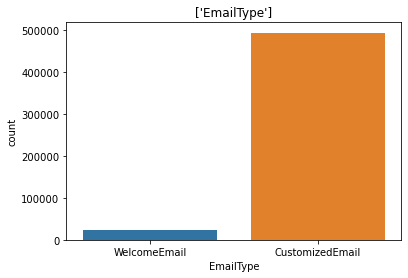

In [56]:
sns.countplot(email['EmailType'])
#plotting countplot for EmailType
plt.title(['EmailType'])

**From the above graph, we can say that most recieved email type is customized email**

Text(0.5, 1.0, "['MailOpened']")

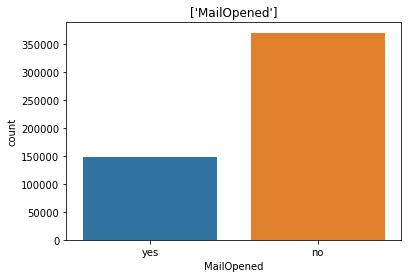

In [57]:
sns.countplot(email['MailOpened'])
#plotting countplot for MailOpened
plt.title(['MailOpened'])

**From the above graph, we can say that most customers haven't opened mail recieved**

Text(0.5, 1.0, 'MailClicked')

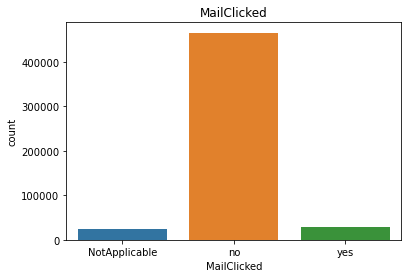

In [58]:
sns.countplot(email['MailClicked'])
#plotting countplot for MailClicked 
plt.title('MailClicked')

**From the above graph, we can say that most customers didn't clicked mail links**

([<matplotlib.patches.Wedge at 0x15b177d48b0>,
 [Text(-1.0463810118426773, 0.33924442229032264, 'no'),
  Text(0.9865978618365224, -0.4864408073132871, 'yes'),
  Text(1.0885269013145162, -0.15845878049075626, 'NotApplicable')],
 [Text(-0.5707532791869149, 0.1850424121583578, '90%'),
  Text(0.5381442882744667, -0.2653313494436111, '5%'),
  Text(0.5937419461715543, -0.08643206208586705, '5%')])

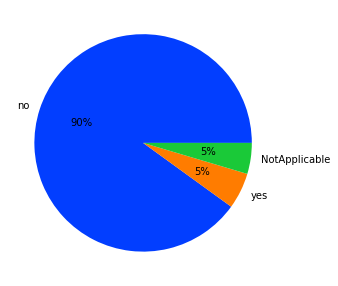

In [59]:
dims = (12, 5)
fig, ax = plt.subplots(figsize=dims)
colors = sns.color_palette('bright')[0:5]
#plotting piechart for MailClicked
e = email['MailClicked'].value_counts()
plt.pie(e,labels = e.index, autopct='%.0f%%', colors=colors)

Transaction data


Text(0.5, 1.0, 'OrderQuantity')

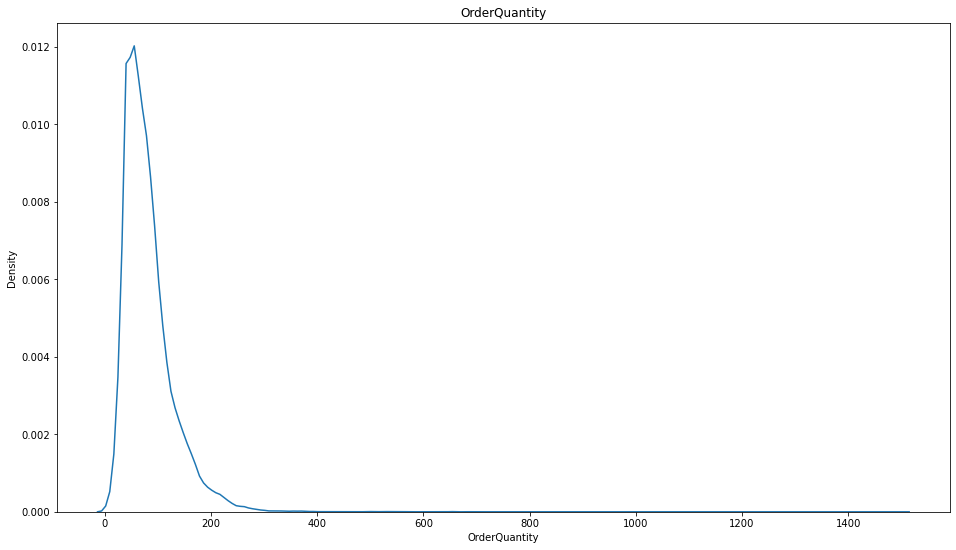

In [60]:
dims = (16, 9)
fig, ax = plt.subplots(figsize=dims)
#plotting Distplot for OrderQuantity
sns.distplot(trans["OrderQuantity"],kde=True,hist=False)
plt.title('OrderQuantity')

**From the above graph, we can get to a conclusion that the orderQuantity is in range 0 to 1500 and most of the ordereQunatity is highed in teh range of 0 to 250**

**------------------------------------------------------------------------------------------------------------------------------**

# **merging data**

In [61]:
#merging data of cust and train to merge1
merge1=pd.merge(cust,train,on='CustomerID',how="inner") 

In [62]:
merge1

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,RetentionPotential
0,C16368,CITY2,0,0,0,Monday,2012,High
1,C20345,CITY2,1,1,1,Friday,2010,Low
2,C17683,CITY2,0,0,0,Wednesday,2010,Medium
3,C18647,CITY4,0,0,0,Monday,2010,Low
4,C36692,CITY2,1,1,0,Friday,2009,Low
...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,2018,Low
23816,C12197,CITY3,1,0,1,Friday,2018,Low
23817,C40967,CITY3,1,0,0,Saturday,2018,Low
23818,C36140,CITY3,1,1,0,Saturday,2018,Low


In [63]:
email_df.columns

Index(['EmailType', 'MailOpened', 'MailClicked', 'yearofemail'], dtype='object')

In [64]:
#merging data  of merge1 and email_df to merge2
merge2 = pd.merge(merge1,email_df,on=['CustomerID'],how='inner')

In [65]:
merge2

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,RetentionPotential,EmailType,MailOpened,MailClicked,yearofemail
0,C16368,CITY2,0,0,0,Monday,2012,High,30,30,30,30
1,C20345,CITY2,1,1,1,Friday,2010,Low,96,96,96,96
2,C17683,CITY2,0,0,0,Wednesday,2010,Medium,1,1,1,1
3,C18647,CITY4,0,0,0,Monday,2010,Low,31,31,31,31
4,C36692,CITY2,1,1,0,Friday,2009,Low,65,65,65,65
...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,2018,Low,1,1,1,1
23816,C12197,CITY3,1,0,1,Friday,2018,Low,1,1,1,1
23817,C40967,CITY3,1,0,0,Saturday,2018,Low,1,1,1,1
23818,C36140,CITY3,1,1,0,Saturday,2018,Low,9,9,9,9


In [66]:
merge2.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
yearofreg                  11
RetentionPotential          3
EmailType                  84
MailOpened                 84
MailClicked                84
yearofemail                84
dtype: int64

In [67]:
merge2['EmailType']

0        30
1        96
2         1
3        31
4        65
         ..
23815     1
23816     1
23817     1
23818     9
23819     1
Name: EmailType, Length: 23820, dtype: int64

In [68]:
merge2.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
yearofreg                  11
RetentionPotential          3
EmailType                  84
MailOpened                 84
MailClicked                84
yearofemail                84
dtype: int64

In [69]:
merge2.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
yearofreg               0
RetentionPotential      0
EmailType               0
MailOpened              0
MailClicked             0
yearofemail             0
dtype: int64

In [70]:
trans_df.columns

Index(['OrderQuantity', 'yearoforder'], dtype='object')

In [71]:
#merging merge2 and trans_df to train_merge
train_merge = pd.merge(merge2,trans_df,on=['CustomerID'],how='inner')

In [72]:
train_merge

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,RetentionPotential,EmailType,MailOpened,MailClicked,yearofemail,OrderQuantity,yearoforder
0,C16368,CITY2,0,0,0,Monday,2012,High,30,30,30,30,15,2013
1,C20345,CITY2,1,1,1,Friday,2010,Low,96,96,96,96,15614,374229
2,C17683,CITY2,0,0,0,Wednesday,2010,Medium,1,1,1,1,443,26141
3,C18647,CITY4,0,0,0,Monday,2010,Low,31,31,31,31,748,14080
4,C36692,CITY2,1,1,0,Friday,2009,Low,65,65,65,65,2350,68422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,2018,Low,1,1,1,1,41,2018
23816,C12197,CITY3,1,0,1,Friday,2018,Low,1,1,1,1,56,2018
23817,C40967,CITY3,1,0,0,Saturday,2018,Low,1,1,1,1,35,2018
23818,C36140,CITY3,1,1,0,Saturday,2018,Low,9,9,9,9,100,4036


In [73]:
train_merge.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
yearofreg                  11
RetentionPotential          3
EmailType                  84
MailOpened                 84
MailClicked                84
yearofemail                84
OrderQuantity            2206
yearoforder              1699
dtype: int64

In [74]:
train_merge.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
yearofreg               0
RetentionPotential      0
EmailType               0
MailOpened              0
MailClicked             0
yearofemail             0
OrderQuantity           0
yearoforder             0
dtype: int64

In [75]:
dups = train_merge.duplicated()

In [76]:
dups

0        False
1        False
2        False
3        False
4        False
         ...  
23815    False
23816    False
23817    False
23818    False
23819    False
Length: 23820, dtype: bool

In [77]:
counts = train_merge["CustomerID"].value_counts()

In [78]:
counts

C16368    1
C40030    1
C28784    1
C25280    1
C15894    1
         ..
C13218    1
C15061    1
C34995    1
C36782    1
C42003    1
Name: CustomerID, Length: 23820, dtype: int64

In [79]:
train_merge.shape

(23820, 14)

In [80]:
train_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
OnlineCommunication,23820.0,0.660411,0.473580,0.0,0.0,1.0,1.0,1.0
AutomaticRefill,23820.0,0.094710,0.292821,0.0,0.0,0.0,0.0,1.0
DoorstepDelivery,23820.0,0.037615,0.190268,0.0,0.0,0.0,0.0,1.0
yearofreg,23820.0,2013.182032,1.952012,2008.0,2012.0,2013.0,2013.0,2018.0
EmailType,23820.0,21.732662,20.040546,1.0,1.0,20.0,41.0,292.0
MailOpened,23820.0,21.732662,20.040546,1.0,1.0,20.0,41.0,292.0
MailClicked,23820.0,21.732662,20.040546,1.0,1.0,20.0,41.0,292.0
yearofemail,23820.0,21.732662,20.040546,1.0,1.0,20.0,41.0,292.0
OrderQuantity,23820.0,357.622922,1335.649680,0.0,41.0,65.0,169.0,51429.0
yearoforder,23820.0,8853.096809,24440.702752,2008.0,2013.0,2014.0,6033.0,517839.0


In [81]:
trans_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQuantity,23820.0,357.622922,1335.649680,0.0,41.0,65.0,169.0,51429.0
yearoforder,23820.0,8853.096809,24440.702752,2008.0,2013.0,2014.0,6033.0,517839.0


In [82]:
train_merge.dtypes

CustomerID              object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
yearofreg                int64
RetentionPotential      object
EmailType                int64
MailOpened               int64
MailClicked              int64
yearofemail              int64
OrderQuantity            int64
yearoforder              int64
dtype: object

In [83]:
#Dropping yearofeamil and yearoforder 
train_merge.drop(['yearofemail','yearoforder'], axis=1, inplace=True)

In [84]:
train_merge

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,RetentionPotential,EmailType,MailOpened,MailClicked,OrderQuantity
0,C16368,CITY2,0,0,0,Monday,2012,High,30,30,30,15
1,C20345,CITY2,1,1,1,Friday,2010,Low,96,96,96,15614
2,C17683,CITY2,0,0,0,Wednesday,2010,Medium,1,1,1,443
3,C18647,CITY4,0,0,0,Monday,2010,Low,31,31,31,748
4,C36692,CITY2,1,1,0,Friday,2009,Low,65,65,65,2350
...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C23511,CITY2,1,1,0,Friday,2018,Low,1,1,1,41
23816,C12197,CITY3,1,0,1,Friday,2018,Low,1,1,1,56
23817,C40967,CITY3,1,0,0,Saturday,2018,Low,1,1,1,35
23818,C36140,CITY3,1,1,0,Saturday,2018,Low,9,9,9,100


In [85]:
train_merge.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
yearofreg                  11
RetentionPotential          3
EmailType                  84
MailOpened                 84
MailClicked                84
OrderQuantity            2206
dtype: int64

In [86]:
train_merge.dtypes

CustomerID              object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
yearofreg                int64
RetentionPotential      object
EmailType                int64
MailOpened               int64
MailClicked              int64
OrderQuantity            int64
dtype: object

In [87]:
for col in ['CustomerID', 'City', 'PreferredDeliveryDay', 
            'RetentionPotential']:
    train_merge[col] = train_merge[col].astype('category')

In [88]:
#dropping CustmerID, yearofreg, Retentionpotential in x
x= train_merge.drop(['CustomerID','yearofreg','RetentionPotential'],axis=1)

In [89]:
#picking up RetentionPotential in y
y= train_merge['RetentionPotential']

In [90]:
x

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity
0,CITY2,0,0,0,Monday,30,30,30,15
1,CITY2,1,1,1,Friday,96,96,96,15614
2,CITY2,0,0,0,Wednesday,1,1,1,443
3,CITY4,0,0,0,Monday,31,31,31,748
4,CITY2,1,1,0,Friday,65,65,65,2350
...,...,...,...,...,...,...,...,...,...
23815,CITY2,1,1,0,Friday,1,1,1,41
23816,CITY3,1,0,1,Friday,1,1,1,56
23817,CITY3,1,0,0,Saturday,1,1,1,35
23818,CITY3,1,1,0,Saturday,9,9,9,100


In [91]:
pd.DataFrame(y)

,RetentionPotential
0,High
1,Low
2,Medium
3,Low
4,Low
...,...
23815,Low
23816,Low
23817,Low
23818,Low


In [92]:
#here we are replacing low with 0, medium with 1 and High with 2
y.replace(('Low','Medium','High'), (2,1,0,),inplace=True)

In [93]:
y.value_counts(normalize=True)

2    0.805416
0    0.157683
1    0.036902
Name: RetentionPotential, dtype: float64

In [94]:
pd.DataFrame(y)

,RetentionPotential
0,0
1,2
2,1
3,2
4,2
...,...
23815,2
23816,2
23817,2
23818,2


# **Splitting data**

In [95]:
#here we are splitting the data into train and validation with test having a split of 30% 
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=123) 

In [96]:
x_train

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity
4252,CITY2,1,1,0,Monday,40,40,40,454
2138,CITY2,0,0,0,Friday,42,42,42,3699
19063,CITY2,0,0,0,Friday,1,1,1,69
5457,CITY2,0,0,0,Friday,19,19,19,1543
11787,CITY1,1,0,0,Thursday,40,40,40,183
...,...,...,...,...,...,...,...,...,...
15377,CITY4,0,0,0,Friday,1,1,1,41
21602,CITY4,1,0,0,Friday,1,1,1,41
17730,CITY1,1,1,1,Thursday,1,1,1,40
15725,CITY2,1,0,0,Thursday,1,1,1,41


In [97]:
x_train.shape

(17865, 9)

In [98]:
x_train.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
EmailType                  int64
MailOpened                 int64
MailClicked                int64
OrderQuantity              int64
dtype: object

In [99]:
x_valid.shape

(5955, 9)

In [100]:
x_valid.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
EmailType                  int64
MailOpened                 int64
MailClicked                int64
OrderQuantity              int64
dtype: object

In [101]:
y_train.shape

(17865,)

In [102]:
y_train.value_counts()

2    14369
0     2837
1      659
Name: RetentionPotential, dtype: int64

In [103]:
y_valid.shape

(5955,)

In [104]:
y_valid.value_counts()

2    4816
0     919
1     220
Name: RetentionPotential, dtype: int64

In [105]:
x1_train = pd.DataFrame(x_train[['OnlineCommunication','AutomaticRefill','DoorstepDelivery']])

In [106]:
x1_train

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
4252,1,1,0
2138,0,0,0
19063,0,0,0
5457,0,0,0
11787,1,0,0
...,...,...,...
15377,0,0,0
21602,1,0,0
17730,1,1,1
15725,1,0,0


In [107]:
x1_train.isnull().sum()

OnlineCommunication    0
AutomaticRefill        0
DoorstepDelivery       0
dtype: int64

In [108]:
x1_valid =  pd.DataFrame(x_valid[['OnlineCommunication','AutomaticRefill','DoorstepDelivery']])

In [109]:
x1_valid

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
16819,1,0,0
7844,0,0,0
23473,1,1,1
16711,1,0,0
1418,1,0,0
...,...,...,...
10712,1,0,0
13647,1,0,0
7111,0,0,0
15246,1,0,0


In [110]:
x1_valid.isnull().sum()

OnlineCommunication    0
AutomaticRefill        0
DoorstepDelivery       0
dtype: int64

**Convert Categorical to numerical**

In [111]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [112]:
cat_attr = x_train.select_dtypes(include=['category']).columns

In [113]:
enc.fit(x_train[cat_attr])

OneHotEncoder()

In [114]:
cols = list(enc.get_feature_names(cat_attr))

In [115]:
cols

['City_CITY1',
 'City_CITY2',
 'City_CITY3',
 'City_CITY4',
 'PreferredDeliveryDay_Friday',
 'PreferredDeliveryDay_Monday',
 'PreferredDeliveryDay_Saturday',
 'PreferredDeliveryDay_Sunday',
 'PreferredDeliveryDay_Thursday',
 'PreferredDeliveryDay_Tuesday',
 'PreferredDeliveryDay_Wednesday']

In [116]:

x_train_ohe=pd.DataFrame(enc.transform(x_train[cat_attr]).toarray(),columns=cols)
x_valid_ohe=pd.DataFrame(enc.transform(x_valid[cat_attr]).toarray(),columns=cols)

In [117]:
print(x_train_ohe.shape)
print(x_valid_ohe.shape)

(17865, 11)
(5955, 11)


In [118]:
x_train_ohe

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17860,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17861,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
x_valid_ohe

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5951,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5952,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5953,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**standardize numerical variables**

In [120]:
num_attr_train = x_train[['OrderQuantity','EmailType','MailOpened','MailClicked']]

In [121]:
num_attr_valid = x_valid[['OrderQuantity','EmailType','MailOpened','MailClicked']]

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(num_attr_train)
col=['OrderQuantity','EmailType','MailOpened','MailClicked']

x_train_std =pd.DataFrame(scaler.transform(num_attr_train),columns=col)
x_valid_std =pd.DataFrame(scaler.transform(num_attr_valid),columns=col)

In [123]:
print(x_train_std.shape)
print(x_valid_std.shape)

(17865, 4)
(5955, 4)


In [124]:
 x_train_ohe.shape

(17865, 11)

In [125]:
x_valid_ohe.shape

(5955, 11)

In [126]:
x_train_std.shape

(17865, 4)

**Concatenate**


In [127]:
x_train_co = pd.concat([x_train_std, x_train_ohe], axis=1)
x_valid_co = pd.concat([x_valid_std, x_valid_ohe], axis=1)

In [128]:
x_train_co1=pd.concat([x_train_co, x1_train], axis=1,join='outer')

In [129]:
x_train_co.shape

(17865, 15)

In [130]:
print(x_train_co.shape)
print(x_valid_co.shape)

(17865, 15)
(5955, 15)


In [131]:
x_train_con = x_train_co.join(x1_train)
x_valid_con = x_valid_co.join(x1_valid) 

In [132]:
x_train_con

,OrderQuantity,EmailType,MailOpened,MailClicked,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,OnlineCommunication,AutomaticRefill,DoorstepDelivery
0,0.060261,0.906318,0.906318,0.906318,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.361158,1.005956,1.005956,1.005956,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,-0.212727,-1.036617,-1.036617,-1.036617,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.832426,-0.139878,-0.139878,-0.139878,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.131894,0.906318,0.906318,0.906318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17860,-0.232581,-1.036617,-1.036617,-1.036617,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17861,-0.232581,-1.036617,-1.036617,-1.036617,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17862,-0.233290,-1.036617,-1.036617,-1.036617,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17863,-0.232581,-1.036617,-1.036617,-1.036617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [133]:
x_valid_con

,OrderQuantity,EmailType,MailOpened,MailClicked,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,OnlineCommunication,AutomaticRefill,DoorstepDelivery
0,-0.236126,-1.036617,-1.036617,-1.036617,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
1,0.037571,1.055775,1.055775,1.055775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
2,0.241780,0.358311,0.358311,0.358311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
3,-0.236126,-1.036617,-1.036617,-1.036617,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,0.057425,1.454325,1.454325,1.454325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,-0.232581,-1.036617,-1.036617,-1.036617,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
5951,-0.224072,-1.036617,-1.036617,-1.036617,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
5952,-0.223363,1.055775,1.055775,1.055775,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5953,-0.232581,0.806680,0.806680,0.806680,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
x_train_con.dtypes

OrderQuantity                     float64
EmailType                         float64
MailOpened                        float64
MailClicked                       float64
City_CITY1                        float64
City_CITY2                        float64
City_CITY3                        float64
City_CITY4                        float64
PreferredDeliveryDay_Friday       float64
PreferredDeliveryDay_Monday       float64
PreferredDeliveryDay_Saturday     float64
PreferredDeliveryDay_Sunday       float64
PreferredDeliveryDay_Thursday     float64
PreferredDeliveryDay_Tuesday      float64
PreferredDeliveryDay_Wednesday    float64
OnlineCommunication               float64
AutomaticRefill                   float64
DoorstepDelivery                  float64
dtype: object

In [135]:
x_train_con.isnull().sum()

OrderQuantity                        0
EmailType                            0
MailOpened                           0
MailClicked                          0
City_CITY1                           0
City_CITY2                           0
City_CITY3                           0
City_CITY4                           0
PreferredDeliveryDay_Friday          0
PreferredDeliveryDay_Monday          0
PreferredDeliveryDay_Saturday        0
PreferredDeliveryDay_Sunday          0
PreferredDeliveryDay_Thursday        0
PreferredDeliveryDay_Tuesday         0
PreferredDeliveryDay_Wednesday       0
OnlineCommunication               4447
AutomaticRefill                   4447
DoorstepDelivery                  4447
dtype: int64

In [136]:
for i in ['OnlineCommunication', 'AutomaticRefill','DoorstepDelivery']:
    x_train_con[i] = x_train_con[i].fillna(1)

In [137]:
x_train_con.isnull().sum()

OrderQuantity                     0
EmailType                         0
MailOpened                        0
MailClicked                       0
City_CITY1                        0
City_CITY2                        0
City_CITY3                        0
City_CITY4                        0
PreferredDeliveryDay_Friday       0
PreferredDeliveryDay_Monday       0
PreferredDeliveryDay_Saturday     0
PreferredDeliveryDay_Sunday       0
PreferredDeliveryDay_Thursday     0
PreferredDeliveryDay_Tuesday      0
PreferredDeliveryDay_Wednesday    0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
dtype: int64

In [138]:
x_valid_con.isnull().sum()

OrderQuantity                        0
EmailType                            0
MailOpened                           0
MailClicked                          0
City_CITY1                           0
City_CITY2                           0
City_CITY3                           0
City_CITY4                           0
PreferredDeliveryDay_Friday          0
PreferredDeliveryDay_Monday          0
PreferredDeliveryDay_Saturday        0
PreferredDeliveryDay_Sunday          0
PreferredDeliveryDay_Thursday        0
PreferredDeliveryDay_Tuesday         0
PreferredDeliveryDay_Wednesday       0
OnlineCommunication               4485
AutomaticRefill                   4485
DoorstepDelivery                  4485
dtype: int64

In [139]:
for i in ['OnlineCommunication', 'AutomaticRefill','DoorstepDelivery']:
    x_valid_con[i] = x_valid_con[i].fillna(1)

In [140]:
x_valid_con.isnull().sum()

OrderQuantity                     0
EmailType                         0
MailOpened                        0
MailClicked                       0
City_CITY1                        0
City_CITY2                        0
City_CITY3                        0
City_CITY4                        0
PreferredDeliveryDay_Friday       0
PreferredDeliveryDay_Monday       0
PreferredDeliveryDay_Saturday     0
PreferredDeliveryDay_Sunday       0
PreferredDeliveryDay_Thursday     0
PreferredDeliveryDay_Tuesday      0
PreferredDeliveryDay_Wednesday    0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
dtype: int64

In [141]:
x_valid_con.dtypes

OrderQuantity                     float64
EmailType                         float64
MailOpened                        float64
MailClicked                       float64
City_CITY1                        float64
City_CITY2                        float64
City_CITY3                        float64
City_CITY4                        float64
PreferredDeliveryDay_Friday       float64
PreferredDeliveryDay_Monday       float64
PreferredDeliveryDay_Saturday     float64
PreferredDeliveryDay_Sunday       float64
PreferredDeliveryDay_Thursday     float64
PreferredDeliveryDay_Tuesday      float64
PreferredDeliveryDay_Wednesday    float64
OnlineCommunication               float64
AutomaticRefill                   float64
DoorstepDelivery                  float64
dtype: object

# ***Model Buildng***

In [142]:
def evaluate_model(act, pred):                   #the fundtion helps us to get error metrics of the model
    from sklearn.metrics import confusion_matrix, recall_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))           
    #this provides us with confusion matrix     
    print("Recall: ", recall_score(act, pred,average =None)[1])
    #tgis provides us with recall score
    
    

In [143]:
 #for getting classification report
from sklearn.metrics import classification_report as cr

In [144]:
 #for getting grid Search
from sklearn.model_selection import GridSearchCV

# ***Upsampling***

In [145]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
x_train_sm, y_train_sm = smote.fit_resample(x_train_con, y_train)
x_valid_sm,y_valid_sm = smote.fit_resample(x_valid_con, y_valid)

In [146]:
np.unique(y_train, return_counts= True)
np.unique(y_train_sm, return_counts= True)

(array([0, 1, 2], dtype=int64), array([14369, 14369, 14369], dtype=int64))

In [147]:
x_train_sm.shape

(43107, 18)

In [148]:
y_train_sm.shape

(43107,)

# **KNN**

In [149]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn1 = KNeighborsClassifier()
clf_knn1.fit(x_train_con, y_train)

train_pred_knn1 = clf_knn1.predict(x_train_con)
valid_pred_knn1 = clf_knn1.predict(x_valid_con)

In [150]:

print("Classification Report \n", cr(y_train, train_pred_knn1))
print("classification report \n", cr(y_valid, valid_pred_knn1))
      

Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.49      0.56      2837
           1       0.89      0.57      0.70       659
           2       0.90      0.95      0.93     14369

    accuracy                           0.87     17865
   macro avg       0.81      0.67      0.73     17865
weighted avg       0.86      0.87      0.86     17865

classification report 
               precision    recall  f1-score   support

           0       0.52      0.38      0.44       919
           1       0.88      0.52      0.65       220
           2       0.88      0.94      0.91      4816

    accuracy                           0.84      5955
   macro avg       0.76      0.61      0.67      5955
weighted avg       0.82      0.84      0.83      5955



In [151]:
print("--Train--")
evaluate_model(y_train, train_pred_knn1)
print("--valid--")
evaluate_model(y_valid, valid_pred_knn1)

--Train--
Confusion Matrix 
 [[ 1398    31  1408]
 [  151   378   130]
 [  630    17 13722]]
Recall:  0.5735963581183612
--valid--
Confusion Matrix 
 [[ 351   12  556]
 [  50  114   56]
 [ 276    4 4536]]
Recall:  0.5181818181818182


**Grid Search KNN**

In [152]:
k_range = list(range(11,14,18))
param_grid_knn = dict(n_neighbors=k_range)

In [153]:
grid_knn =  GridSearchCV(clf_knn1, param_grid_knn, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [154]:
grid_search_knn = grid_knn.fit(x_train_con, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [155]:
grid_search_knn.best_params_

{'n_neighbors': 11}

In [156]:
train_pred_knn2 = grid_search_knn.predict(x_train_con)
valid_pred_knn2 = grid_search_knn.predict(x_valid_con)

In [157]:
print("Confusion Matrix \n", cr(y_train, train_pred_knn2))
print("Confusion Matrix \n", cr(y_valid, valid_pred_knn2))

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.61      0.41      0.49      2837
           1       0.93      0.44      0.59       659
           2       0.88      0.96      0.92     14369

    accuracy                           0.85     17865
   macro avg       0.81      0.60      0.67     17865
weighted avg       0.84      0.85      0.84     17865

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.54      0.37      0.44       919
           1       0.92      0.37      0.53       220
           2       0.88      0.95      0.91      4816

    accuracy                           0.84      5955
   macro avg       0.78      0.56      0.63      5955
weighted avg       0.83      0.84      0.83      5955



In [158]:
print("--Train--")
evaluate_model(y_train, train_pred_knn2)
print("--valid--")
evaluate_model(y_valid, valid_pred_knn2)

--Train--
Confusion Matrix 
 [[ 1165    17  1655]
 [  191   288   180]
 [  548     5 13816]]
Recall:  0.4370257966616085
--valid--
Confusion Matrix 
 [[ 340    4  575]
 [  67   81   72]
 [ 227    3 4586]]
Recall:  0.36818181818181817


**After Upsampling KNN**

In [159]:
clf_knn2 = KNeighborsClassifier()
clf_knn2.fit(x_train_sm, y_train_sm)

train_pred_knn3 = clf_knn2.predict(x_train_sm)
valid_pred_knn3 = clf_knn2.predict(x_valid_con)

In [160]:
print("Classification Report \n", cr(y_train_sm, train_pred_knn3))
print("classification report \n", cr(y_valid, valid_pred_knn3))

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     14369
           1       0.96      0.95      0.95     14369
           2       0.89      0.79      0.84     14369

    accuracy                           0.87     43107
   macro avg       0.88      0.87      0.87     43107
weighted avg       0.88      0.87      0.87     43107

classification report 
               precision    recall  f1-score   support

           0       0.35      0.69      0.46       919
           1       0.48      0.70      0.57       220
           2       0.94      0.74      0.83      4816

    accuracy                           0.73      5955
   macro avg       0.59      0.71      0.62      5955
weighted avg       0.83      0.73      0.76      5955



In [161]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_knn3)
print("--valid--")
evaluate_model(y_valid, valid_pred_knn3)

--Train--
Confusion Matrix 
 [[12601   431  1337]
 [  685 13603    81]
 [ 2801   182 11386]]
Recall:  0.9466907926786833
--valid--
Confusion Matrix 
 [[ 632   75  212]
 [  39  154   27]
 [1134   95 3587]]
Recall:  0.7


# **RandomForest**

In [162]:
from sklearn.ensemble import RandomForestClassifier
clf_rf1 = RandomForestClassifier(n_estimators=3)
clf_rf1.fit(x_train_con, y_train)

train_pred_rf1 = clf_rf1.predict(x_train_con)
valid_pred_rf1 = clf_rf1.predict(x_valid_con)

In [163]:

print("Classification Report \n", cr(y_train, train_pred_rf1))
print("classification report \n", cr(y_valid, valid_pred_rf1))
      

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.66      0.73      2837
           1       0.95      0.87      0.91       659
           2       0.93      0.98      0.95     14369

    accuracy                           0.92     17865
   macro avg       0.90      0.83      0.86     17865
weighted avg       0.92      0.92      0.92     17865

classification report 
               precision    recall  f1-score   support

           0       0.49      0.43      0.45       919
           1       0.74      0.63      0.68       220
           2       0.89      0.92      0.91      4816

    accuracy                           0.83      5955
   macro avg       0.71      0.66      0.68      5955
weighted avg       0.82      0.83      0.83      5955



In [164]:
print("--Train--")
evaluate_model(y_train, train_pred_rf1)
print("--valid--")
evaluate_model(y_valid, valid_pred_rf1)

--Train--
Confusion Matrix 
 [[ 1860    21   956]
 [   33   572    54]
 [  342    10 14017]]
Recall:  0.8679817905918058
--valid--
Confusion Matrix 
 [[ 391   34  494]
 [  40  138   42]
 [ 374   15 4427]]
Recall:  0.6272727272727273


**Gridsearch RandomForest**

In [165]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[50,100,200,250],
      'criterion':['gini','entropy'],
       'max_depth':[10,20,50,100]}

In [166]:
grid_rf=GridSearchCV(estimator=clf_rf1, param_grid=param,cv=3,verbose=1)
grid_rf.fit(x_train_con, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=1)

In [167]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [168]:
train_pred_rf2 = grid_rf.predict(x_train_con)
valid_pred_rf2 = grid_rf.predict(x_valid_con)

In [169]:
print("Confusion Matrix \n", cr(y_train, train_pred_rf2))
print("Confusion Matrix \n", cr(y_valid, valid_pred_rf2))

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.79      0.30      0.43      2837
           1       0.92      0.77      0.84       659
           2       0.87      0.99      0.93     14369

    accuracy                           0.87     17865
   macro avg       0.86      0.69      0.73     17865
weighted avg       0.86      0.87      0.85     17865

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.64      0.24      0.35       919
           1       0.81      0.66      0.73       220
           2       0.87      0.98      0.92      4816

    accuracy                           0.85      5955
   macro avg       0.77      0.63      0.67      5955
weighted avg       0.83      0.85      0.82      5955



In [170]:
print("--Train--")
evaluate_model(y_train, train_pred_rf2)
print("--valid--")

evaluate_model(y_valid, valid_pred_rf2)

--Train--
Confusion Matrix 
 [[  848    35  1954]
 [   50   508   101]
 [  173     7 14189]]
Recall:  0.7708649468892261
--valid--
Confusion Matrix 
 [[ 223   23  673]
 [  31  146   43]
 [  96   12 4708]]
Recall:  0.6636363636363637


**After Upsampling RandomForest**

In [171]:
#from sklearn.ensemble import RandomForestClassifier
clf_rf3 = RandomForestClassifier(n_estimators=3)
clf_rf3.fit(x_train_sm, y_train_sm)

train_pred_rf3 = clf_rf3.predict(x_train_sm)
valid_pred_rf3 = clf_rf3.predict(x_valid_con)

In [172]:
from sklearn.metrics import classification_report as cr
print("Classification Report \n", cr(y_train_sm, train_pred_rf3))
print("classification report \n", cr(y_valid, valid_pred_rf3))

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     14369
           1       0.98      0.98      0.98     14369
           2       0.93      0.87      0.90     14369

    accuracy                           0.92     43107
   macro avg       0.92      0.92      0.92     43107
weighted avg       0.92      0.92      0.92     43107

classification report 
               precision    recall  f1-score   support

           0       0.37      0.63      0.46       919
           1       0.53      0.70      0.60       220
           2       0.93      0.79      0.85      4816

    accuracy                           0.76      5955
   macro avg       0.61      0.70      0.64      5955
weighted avg       0.83      0.76      0.78      5955



In [173]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf3)
print("--valid--")
evaluate_model(y_valid, valid_pred_rf3)

--Train--
Confusion Matrix 
 [[13248   224   897]
 [  204 14084    81]
 [ 1783   102 12484]]
Recall:  0.9801656343517294
--valid--
Confusion Matrix 
 [[ 577   79  263]
 [  34  153   33]
 [ 956   58 3802]]
Recall:  0.6954545454545454


# **Decision Tree**

In [174]:
from sklearn.tree import DecisionTreeClassifier
clf_dt1 = DecisionTreeClassifier()
clf_dt1 = clf_dt1.fit(x_train_con, y_train)

In [175]:
train_pred_dt1 = clf_dt1.predict(x_train_con)
valid_pred_dt1 = clf_dt1.predict(x_valid_con)

In [176]:
print("Confusion Matrix \n", cr(y_train, train_pred_dt1))
print("Confusion Matrix \n", cr(y_valid, valid_pred_dt1))

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      2837
           1       1.00      0.94      0.97       659
           2       0.95      0.98      0.96     14369

    accuracy                           0.94     17865
   macro avg       0.94      0.90      0.92     17865
weighted avg       0.94      0.94      0.94     17865

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.42      0.40      0.41       919
           1       0.64      0.61      0.62       220
           2       0.89      0.90      0.89      4816

    accuracy                           0.81      5955
   macro avg       0.65      0.64      0.64      5955
weighted avg       0.81      0.81      0.81      5955



In [177]:
print("--Train--")
evaluate_model(y_train, train_pred_dt1)
print("--valid--")

evaluate_model(y_valid, valid_pred_dt1)

--Train--
Confusion Matrix 
 [[ 2166     0   671]
 [    6   622    31]
 [  316     2 14051]]
Recall:  0.9438543247344461
--valid--
Confusion Matrix 
 [[ 366   44  509]
 [  44  134   42]
 [ 455   31 4330]]
Recall:  0.6090909090909091


**after upsampling Decision Tree**

In [178]:
clf_dt2 = DecisionTreeClassifier()
clf_dt2.fit(x_train_sm, y_train_sm)

train_pred_dt2 = clf_dt2.predict(x_train_sm)
valid_pred_dt2 = clf_dt2.predict(x_valid_con)

In [179]:

print("Classification Report \n", cr(y_train_sm, train_pred_dt2))
print("classification report \n", cr(y_valid, valid_pred_dt2))

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     14369
           1       0.99      0.99      0.99     14369
           2       0.97      0.88      0.92     14369

    accuracy                           0.95     43107
   macro avg       0.95      0.95      0.95     43107
weighted avg       0.95      0.95      0.95     43107

classification report 
               precision    recall  f1-score   support

           0       0.34      0.60      0.44       919
           1       0.52      0.71      0.60       220
           2       0.92      0.78      0.84      4816

    accuracy                           0.75      5955
   macro avg       0.59      0.70      0.63      5955
weighted avg       0.82      0.75      0.77      5955



In [180]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_dt2)
print("--valid--")
evaluate_model(y_valid, valid_pred_dt2)

--Train--
Confusion Matrix 
 [[13896    62   411]
 [   71 14272    26]
 [ 1741    55 12573]]
Recall:  0.9932493562530448
--valid--
Confusion Matrix 
 [[ 549   75  295]
 [  40  157   23]
 [1010   72 3734]]
Recall:  0.7136363636363636


**decision tree gridsearch**

In [181]:
params = {
    'max_leaf_nodes': [2, 6, 10, 16, 22,28],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16]}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)



In [182]:
grid_search_dt.fit(x_train_con, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 6, 10, 16, 22, 28],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16]},
             verbose=1)

In [183]:
grid_search_dt.best_params_

{'max_leaf_nodes': 22, 'min_samples_split': 2}

In [184]:
train_pred_dt3 = grid_search_dt.predict(x_train_con)
valid_pred_dt3 = grid_search_dt.predict(x_valid_con)

In [185]:
print("Confusion Matrix \n", cr(y_train, train_pred_dt3))
print("Confusion Matrix \n", cr(y_valid, valid_pred_dt3))

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.60      0.41      0.48      2837
           1       0.81      0.68      0.74       659
           2       0.89      0.95      0.92     14369

    accuracy                           0.86     17865
   macro avg       0.77      0.68      0.71     17865
weighted avg       0.84      0.86      0.84     17865

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.57      0.40      0.47       919
           1       0.80      0.68      0.73       220
           2       0.89      0.95      0.92      4816

    accuracy                           0.85      5955
   macro avg       0.75      0.67      0.71      5955
weighted avg       0.84      0.85      0.84      5955



In [186]:
print("--Train--")
evaluate_model(y_train, train_pred_dt3)
print("--valid--")
evaluate_model(y_valid, valid_pred_dt3)

--Train--
Confusion Matrix 
 [[ 1153    75  1609]
 [  101   450   108]
 [  664    32 13673]]
Recall:  0.6828528072837633
--valid--
Confusion Matrix 
 [[ 365   25  529]
 [  33  149   38]
 [ 239   12 4565]]
Recall:  0.6772727272727272


# **GradientBoosting**

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb1 = GradientBoostingClassifier()

clf_gb1 = clf_gb1.fit(x_train_con, y_train)

In [188]:
train_pred_gb1 = clf_gb1.predict(x_train_con)
valid_pred_gb1 = clf_gb1.predict(x_valid_con)

In [189]:
print("Confusion Matrix \n", cr(y_train, train_pred_gb1))
print("Confusion Matrix \n", cr(y_valid, valid_pred_gb1))

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.63      0.37      0.47      2837
           1       0.86      0.71      0.77       659
           2       0.88      0.96      0.92     14369

    accuracy                           0.86     17865
   macro avg       0.79      0.68      0.72     17865
weighted avg       0.84      0.86      0.84     17865

Confusion Matrix 
               precision    recall  f1-score   support

           0       0.60      0.36      0.45       919
           1       0.83      0.69      0.75       220
           2       0.88      0.96      0.92      4816

    accuracy                           0.86      5955
   macro avg       0.77      0.67      0.71      5955
weighted avg       0.84      0.86      0.84      5955



In [190]:
print("--Train--")
evaluate_model(y_train, train_pred_gb1)
print("--valid--")
evaluate_model(y_valid, valid_pred_gb1)

--Train--
Confusion Matrix 
 [[ 1052    59  1726]
 [   97   466    96]
 [  512    19 13838]]
Recall:  0.7071320182094082
--valid--
Confusion Matrix 
 [[ 334   19  566]
 [  34  151   35]
 [ 188   11 4617]]
Recall:  0.6863636363636364


**GradientBoosting Upsampling**

In [191]:
clf_gb2 = GradientBoostingClassifier()
clf_gb2.fit(x_train_sm, y_train_sm)

train_pred_gb2 = clf_gb2.predict(x_train_sm)
valid_pred_gb2 = clf_gb2.predict(x_valid_con)

In [192]:

print("Classification Report \n", cr(y_train_sm, train_pred_gb2))
print("classification report \n", cr(y_valid, valid_pred_gb2))

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.87      0.79     14369
           1       0.93      0.90      0.92     14369
           2       0.90      0.73      0.80     14369

    accuracy                           0.83     43107
   macro avg       0.85      0.83      0.83     43107
weighted avg       0.85      0.83      0.83     43107

classification report 
               precision    recall  f1-score   support

           0       0.35      0.83      0.49       919
           1       0.62      0.80      0.70       220
           2       0.97      0.70      0.81      4816

    accuracy                           0.73      5955
   macro avg       0.65      0.78      0.67      5955
weighted avg       0.86      0.73      0.76      5955



In [193]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_gb2)
print("--valid--")
evaluate_model(y_valid, valid_pred_gb2)

--Train--
Confusion Matrix 
 [[12539   792  1038]
 [ 1241 12967   161]
 [ 3748   188 10433]]
Recall:  0.9024288398635952
--valid--
Confusion Matrix 
 [[ 766   51  102]
 [  31  177   12]
 [1384   56 3376]]
Recall:  0.8045454545454546


**Grid search GBM**

In [194]:
from sklearn.model_selection import GridSearchCV
param={'loss':['deviance'],
       'learning_rate':[0.01,0.1,0,1,10],
       'n_estimators':[10]}

In [195]:
grid_search_gb = GridSearchCV(clf_gb1, param, verbose=1, cv=3,n_jobs=-1)
grid_search_gb.fit(x_train_con, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0, 1, 10],
                         'loss': ['deviance'], 'n_estimators': [10]},
             verbose=1)

In [196]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 10}

In [197]:
train_pred_gb3 = grid_search_gb.predict(x_train_con)
valid_pred_gb3 = grid_search_gb.predict(x_valid_con)

In [198]:

print("Classification Report \n", cr(y_train, train_pred_gb3))
print("classification report \n", cr(y_valid, valid_pred_gb3))

Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.10      0.18      2837
           1       0.86      0.64      0.74       659
           2       0.84      0.99      0.91     14369

    accuracy                           0.84     17865
   macro avg       0.78      0.58      0.61     17865
weighted avg       0.81      0.84      0.79     17865

classification report 
               precision    recall  f1-score   support

           0       0.65      0.10      0.18       919
           1       0.84      0.64      0.73       220
           2       0.85      0.99      0.91      4816

    accuracy                           0.84      5955
   macro avg       0.78      0.58      0.61      5955
weighted avg       0.82      0.84      0.79      5955



In [199]:
print("--Train--")
evaluate_model(y_train, train_pred_gb3)
print("--valid--")
evaluate_model(y_valid, valid_pred_gb3)

--Train--
Confusion Matrix 
 [[  295    50  2492]
 [   67   423   169]
 [   95    17 14257]]
Recall:  0.6418816388467374
--valid--
Confusion Matrix 
 [[  95   17  807]
 [  25  141   54]
 [  26    9 4781]]
Recall:  0.6409090909090909


# **AdaBoost**

In [200]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_con, y_train)

AdaBoostClassifier()

In [201]:
train_pred_ada = ada.predict(x_train_con)
valid_pred_ada = ada.predict(x_valid_con)

In [202]:
print("Classification Report \n", cr(y_train, train_pred_ada))
print("classification report \n", cr(y_valid, valid_pred_ada))

Classification Report 
               precision    recall  f1-score   support

           0       0.53      0.40      0.45      2837
           1       0.72      0.72      0.72       659
           2       0.89      0.93      0.91     14369

    accuracy                           0.84     17865
   macro avg       0.71      0.68      0.70     17865
weighted avg       0.82      0.84      0.83     17865

classification report 
               precision    recall  f1-score   support

           0       0.52      0.43      0.47       919
           1       0.74      0.71      0.73       220
           2       0.90      0.93      0.91      4816

    accuracy                           0.84      5955
   macro avg       0.72      0.69      0.70      5955
weighted avg       0.83      0.84      0.84      5955



In [203]:
print("--Train--")
evaluate_model(y_train, train_pred_ada)
print("--valid--")
evaluate_model(y_valid, valid_pred_ada)

--Train--
Confusion Matrix 
 [[ 1136    99  1602]
 [   99   477    83]
 [  923    82 13364]]
Recall:  0.723823975720789
--valid--
Confusion Matrix 
 [[ 394   32  493]
 [  33  157   30]
 [ 334   22 4460]]
Recall:  0.7136363636363636


**Grid Sreach for adaboost**

In [204]:
param={
       'learning_rate':[0.01,0.1,0,1,10],
       'n_estimators':[10,20,30,40]}

In [205]:
grid_search_ada = GridSearchCV(ada, param, verbose=1, cv=3)
grid_search_ada.fit(x_train_con, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0, 1, 10],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=1)

In [206]:
grid_search_ada.best_params_

{'learning_rate': 1, 'n_estimators': 30}

In [207]:
train_pred_ada2 = grid_search_ada.predict(x_train_con)
valid_pred_ada2 = grid_search_ada.predict(x_valid_con)

In [208]:
print("Classification Report \n", cr(y_train, train_pred_ada2))
print("classification report \n", cr(y_valid, valid_pred_ada2))

Classification Report 
               precision    recall  f1-score   support

           0       0.53      0.40      0.45      2837
           1       0.67      0.76      0.71       659
           2       0.89      0.93      0.91     14369

    accuracy                           0.84     17865
   macro avg       0.70      0.69      0.69     17865
weighted avg       0.82      0.84      0.83     17865

classification report 
               precision    recall  f1-score   support

           0       0.52      0.41      0.46       919
           1       0.70      0.75      0.72       220
           2       0.89      0.93      0.91      4816

    accuracy                           0.84      5955
   macro avg       0.70      0.70      0.70      5955
weighted avg       0.83      0.84      0.83      5955



In [209]:
print("--Train--")
evaluate_model(y_train, train_pred_ada2)
print("--valid--")
evaluate_model(y_valid, valid_pred_ada2)

--Train--
Confusion Matrix 
 [[ 1124   132  1581]
 [   77   498    84]
 [  931   112 13326]]
Recall:  0.7556904400606981
--valid--
Confusion Matrix 
 [[ 380   43  496]
 [  26  165   29]
 [ 331   29 4456]]
Recall:  0.75


**upsampling adaboost**

In [210]:
from sklearn.ensemble import AdaBoostClassifier
ada3 = AdaBoostClassifier()
ada3.fit(x_train_sm, y_train_sm)

AdaBoostClassifier()

In [211]:
train_pred_ada3 = ada3.predict(x_train_sm)
valid_pred_ada3 = ada3.predict(x_valid_con)

In [212]:
print("Classification Report \n", cr(y_train_sm, train_pred_ada3))
print("classification report \n", cr(y_valid, valid_pred_ada3))

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.86      0.75     14369
           1       0.90      0.89      0.89     14369
           2       0.88      0.64      0.74     14369

    accuracy                           0.80     43107
   macro avg       0.82      0.80      0.79     43107
weighted avg       0.82      0.80      0.79     43107

classification report 
               precision    recall  f1-score   support

           0       0.32      0.86      0.46       919
           1       0.48      0.81      0.60       220
           2       0.97      0.62      0.76      4816

    accuracy                           0.67      5955
   macro avg       0.59      0.76      0.61      5955
weighted avg       0.85      0.67      0.71      5955



In [213]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_ada3)
print("--valid--")
evaluate_model(y_valid, valid_pred_ada3)

--Train--
Confusion Matrix 
 [[12364  1015   990]
 [ 1329 12777   263]
 [ 4754   469  9146]]
Recall:  0.8892059294314149
--valid--
Confusion Matrix 
 [[ 787   61   71]
 [  34  178    8]
 [1671  135 3010]]
Recall:  0.8090909090909091


# **XGboost**

In [214]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_con, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [215]:
train_pred_xgb = xgb.predict(x_train_con)
valid_pred_xgb = xgb.predict(x_valid_con)

In [216]:
print("Classification Report \n", cr(y_train, train_pred_xgb))
print("classification report \n", cr(y_valid, valid_pred_xgb))

Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.48      0.59      2837
           1       0.99      0.84      0.91       659
           2       0.90      0.98      0.94     14369

    accuracy                           0.89     17865
   macro avg       0.89      0.76      0.81     17865
weighted avg       0.88      0.89      0.88     17865

classification report 
               precision    recall  f1-score   support

           0       0.57      0.36      0.44       919
           1       0.79      0.65      0.71       220
           2       0.88      0.95      0.92      4816

    accuracy                           0.85      5955
   macro avg       0.75      0.65      0.69      5955
weighted avg       0.83      0.85      0.84      5955



In [217]:
print("--Train--")
evaluate_model(y_train, train_pred_xgb)
print("--valid--")
evaluate_model(y_valid, valid_pred_xgb)

--Train--
Confusion Matrix 
 [[ 1360     4  1473]
 [   50   551    58]
 [  349     3 14017]]
Recall:  0.8361153262518968
--valid--
Confusion Matrix 
 [[ 331   22  566]
 [  38  143   39]
 [ 210   16 4590]]
Recall:  0.65


**Upsampling XGB**

In [218]:
xgb2 = XGBClassifier()
xgb2.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [219]:
train_pred_xgb2 = xgb2.predict(x_train_sm)
valid_pred_xgb2 = xgb2.predict(x_valid_con)

In [220]:
print("Classification Report \n", cr(y_train_sm, train_pred_xgb2))
print("classification report \n", cr(y_valid, valid_pred_xgb2))

Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     14369
           1       0.96      0.94      0.95     14369
           2       0.94      0.79      0.86     14369

    accuracy                           0.88     43107
   macro avg       0.89      0.88      0.88     43107
weighted avg       0.89      0.88      0.88     43107

classification report 
               precision    recall  f1-score   support

           0       0.37      0.78      0.50       919
           1       0.67      0.75      0.71       220
           2       0.95      0.75      0.84      4816

    accuracy                           0.75      5955
   macro avg       0.67      0.76      0.68      5955
weighted avg       0.85      0.75      0.78      5955



In [221]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_xgb2)
print("--valid--")
evaluate_model(y_valid, valid_pred_xgb2)

--Train--
Confusion Matrix 
 [[13213   489   667]
 [  849 13459    61]
 [ 3014    49 11306]]
Recall:  0.9366692184563992
--valid--
Confusion Matrix 
 [[ 714   51  154]
 [  32  166   22]
 [1175   29 3612]]
Recall:  0.7545454545454545


**Gridsearch XGB**

In [222]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=3,
    seed=22
)

In [223]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [224]:
grid_search_XGB = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 2,
    verbose=True
)

In [225]:
grid_search_XGB.fit(x_train_con, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [226]:
grid_search_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

In [227]:
train_pred_xgb3 = grid_search_XGB.predict(x_train_con)
valid_pred_xgb3 = grid_search_XGB.predict(x_valid_con)

In [228]:
print("--Train--")
evaluate_model(y_train, train_pred_xgb3)
print("--valid--")
evaluate_model(y_valid, valid_pred_xgb3)

--Train--
Confusion Matrix 
 [[  540    56  2241]
 [  102   438   119]
 [  199    29 14141]]
Recall:  0.6646433990895296
--valid--
Confusion Matrix 
 [[ 194   18  707]
 [  35  145   40]
 [  64   11 4741]]
Recall:  0.6590909090909091


# **creating dataframe**

In [229]:
performance_columns = ['Model name','Train recall', 'Test recall']
performance_comparison = pd.DataFrame(columns=performance_columns)

In [230]:
def add_to_perform_compare_df(df, model_name, train_actual, train_predict, test_actual, test_predict):
    #function to create dataframe of all the evaluaction metrics of all the models 
    from sklearn.metrics import recall_score
    
    #for test Recall   
    train_recall = recall_score(train_actual, train_predict,average='weighted')
    #for train Recall
    test_recall = recall_score(test_actual,test_predict,average='weighted')
   
    df = df.append(pd.Series([model_name, train_recall, test_recall],index=df.columns),ignore_index=True)
    return df

In [231]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN', y_train, train_pred_knn1, y_valid, valid_pred_knn1)

In [232]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN_gridsearch', y_train, train_pred_knn2, y_valid, valid_pred_knn2)

In [233]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'KNN_upsampled', y_train_sm, train_pred_knn3, y_valid, valid_pred_knn3)

In [234]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'RandomForest', y_train, train_pred_rf1, y_valid, valid_pred_rf1)

In [235]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'RandomForest_grid', y_train, train_pred_rf2, y_valid, valid_pred_rf2)

In [236]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'RandomForest_upsampled', y_train_sm, train_pred_rf3, y_valid, valid_pred_rf3)

In [237]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree', y_train, train_pred_dt1, y_valid, valid_pred_dt1)

In [238]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree_upsampling', y_train_sm, train_pred_dt2, y_valid, valid_pred_dt2)

In [239]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'Decision Tree_grid', y_train, train_pred_dt3, y_valid, valid_pred_dt3)

In [240]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'GBM', y_train, train_pred_gb1, y_valid, valid_pred_gb1)

In [241]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'GBM_grid', y_train, train_pred_gb3, y_valid, valid_pred_gb3)

In [242]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'GBM_upsampled', y_train_sm, train_pred_gb2, y_valid, valid_pred_gb2)

In [243]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'AdaBoost', y_train, train_pred_ada, y_valid, valid_pred_ada)

In [244]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'ada_grid', y_train, train_pred_ada2, y_valid, valid_pred_ada2)

In [245]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'GBM_upsampled', y_train_sm, train_pred_ada3, y_valid, valid_pred_ada3)

In [246]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'XGB', y_train, train_pred_xgb, y_valid, valid_pred_xgb)

In [247]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'XGB_grid', y_train, train_pred_xgb3, y_valid, valid_pred_xgb3)

In [248]:
performance_comparison = add_to_perform_compare_df(performance_comparison, 'XGB_upsampled', y_train_sm, train_pred_xgb2, y_valid, valid_pred_xgb2)

In [249]:
performance_comparison

,Model name,Train recall,Test recall
0,KNN,0.867506,0.839798
1,KNN_gridsearch,0.854688,0.840806
2,KNN_upsampled,0.872016,0.734341
3,RandomForest,0.920739,0.832242
4,RandomForest_grid,0.870137,0.852561
5,RandomForest_upsampled,0.923655,0.761041
6,Decision Tree,0.942569,0.811083
7,Decision Tree_upsampling,0.945113,0.745592
8,Decision Tree_grid,0.85508,0.852897
9,GBM,0.859558,0.856759


**>From the above table we can see that gridsearch of every model performed a bit better than any other model**

**>Decision Tree_upsampled has the best train recall score ie, 0.94**

**>GBM has the best Test recall score ie, 0.86**




# Test data

# **Reading Test data**

In [250]:
##reading data file
cust_test = pd.read_excel(r'C:\Users\saipr\Downloads\TestData\Customerdata_Test.xlsx',na_values=['#','?',',','*'])
email_test = pd.read_excel(r'C:\Users\saipr\Downloads\TestData\Emaildata_Test.xlsx',na_values=['#','?',',','*'])
test = pd.read_excel(r'C:\Users\saipr\Downloads\TestData\Test.xlsx',na_values=['#','?',',','*'])
trans_test = pd.read_excel(r'C:\Users\saipr\Downloads\TestData\transactionsdata_Test.xlsx',na_values=['#','?',',','*'])
 

**Checking shape**

In [251]:
print(cust_test.shape)
print(email_test.shape)
print(trans_test.shape)
print(test.shape)

(5955, 7)
(129074, 6)
(26768, 4)
(5955, 1)


In [252]:
cust_test

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday
...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday
5951,C28951,CITY3,2018-01-17,1,0,0,Friday
5952,C38741,CITY3,2018-01-17,1,0,0,Monday
5953,C20407,CITY2,2018-01-17,1,0,0,Friday


In [253]:
email_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


In [254]:
trans_test

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179
...,...,...,...,...
26763,C32947,2018-01-17,21:35:26,41
26764,C28951,2018-01-17,17:05:50,40
26765,C38741,2018-01-17,18:56:16,36
26766,C20407,2018-01-17,10:24:52,75


**Sorting according to CustomerID**

In [255]:
#cust_test = cust_test.sort_values("CustomerID", ascending=True)

In [256]:
#email_test = email_test.sort_values("CustomerID", ascending=True)

In [257]:
#trans_test = trans_test.sort_values('CustomerID', ascending=True)

In [258]:
#test = test.sort_values('CustomerID',ascending=True)

In [259]:
cust_test.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [260]:
cust_test.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [261]:
email_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [262]:

email_test.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [263]:
email_test.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [264]:
email_test['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [265]:
trans_test.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [266]:
trans_test.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [267]:
test.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [268]:
test.dtypes

CustomerID    object
dtype: object

# **Preprpcessing test data**

**Extracting year form DateOfRegistration**

In [269]:
cust_test['DateOfRegistration'] = pd.to_datetime(cust_test['DateOfRegistration'])
cust_test['yearofreg'] = cust_test['DateOfRegistration'].apply(lambda x:x.year)

In [270]:
cust_test

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008
2,C19041,CITY4,2011-01-24,0,1,0,Friday,2011
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,2010
4,C26718,CITY2,2010-10-02,1,0,0,Monday,2010
...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday,2018
5951,C28951,CITY3,2018-01-17,1,0,0,Friday,2018
5952,C38741,CITY3,2018-01-17,1,0,0,Monday,2018
5953,C20407,CITY2,2018-01-17,1,0,0,Friday,2018


In [271]:
cust_test.drop('DateOfRegistration', axis=1, inplace=True)

In [272]:
cust_test

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg
0,C17838,CITY4,0,0,0,Thursday,2010
1,C12403,CITY2,1,1,0,Wednesday,2008
2,C19041,CITY4,0,1,0,Friday,2011
3,C24069,CITY2,0,0,0,Wednesday,2010
4,C26718,CITY2,1,0,0,Monday,2010
...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,2018
5951,C28951,CITY3,1,0,0,Friday,2018
5952,C38741,CITY3,1,0,0,Monday,2018
5953,C20407,CITY2,1,0,0,Friday,2018


In [273]:
cust_test.dtypes

CustomerID              object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
yearofreg                int64
dtype: object

**Extracting year form DateOfEmail**

In [274]:
email_test['DateOfemail'] = pd.to_datetime(email_test['DateOfemail'])
email_test['yearofemail'] = email_test['DateOfemail'].apply(lambda x:x.year)

In [275]:
email_test

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,yearofemail
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2010
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2008
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable,2011
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable,2010
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable,2010
...,...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no,2018
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no,2018
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes,2018
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no,2018


In [276]:
email_test.drop(['DateOfemail','timestamp'], axis=1, inplace=True)

In [277]:
email_test

,CustomerID,EmailType,MailOpened,MailClicked,yearofemail
0,C17838,WelcomeEmail,yes,NotApplicable,2010
1,C12403,WelcomeEmail,yes,NotApplicable,2008
2,C19041,WelcomeEmail,yes,NotApplicable,2011
3,C24069,WelcomeEmail,yes,NotApplicable,2010
4,C26718,WelcomeEmail,yes,NotApplicable,2010
...,...,...,...,...,...
129069,C30169,CustomizedEmail,no,no,2018
129070,C30169,CustomizedEmail,no,no,2018
129071,C30169,CustomizedEmail,yes,yes,2018
129072,C30169,CustomizedEmail,yes,no,2018


In [278]:
email_test.dtypes

CustomerID     object
EmailType      object
MailOpened     object
MailClicked    object
yearofemail     int64
dtype: object

**Extracting year form DateOfOrder**

In [279]:
trans_test['DateOfOrder'] = pd.to_datetime(trans_test['DateOfOrder'])
trans_test['yearoforder'] = trans_test['DateOfOrder'].apply(lambda x:x.year)

In [280]:
trans_test

,CustomerID,DateOfOrder,timestamp,OrderQuantity,yearoforder
0,C17838,2011-03-28,17:41:08,55,2011
1,C12403,2010-10-12,15:58:02,174,2010
2,C12403,2010-11-27,20:13:48,171,2010
3,C12403,2011-12-09,14:34:44,166,2011
4,C12403,2011-03-04,18:20:18,179,2011
...,...,...,...,...,...
26763,C32947,2018-01-17,21:35:26,41,2018
26764,C28951,2018-01-17,17:05:50,40,2018
26765,C38741,2018-01-17,18:56:16,36,2018
26766,C20407,2018-01-17,10:24:52,75,2018


In [281]:
trans_test.drop(['DateOfOrder','timestamp'], axis=1, inplace=True)

In [282]:
trans_test

,CustomerID,OrderQuantity,yearoforder
0,C17838,55,2011
1,C12403,174,2010
2,C12403,171,2010
3,C12403,166,2011
4,C12403,179,2011
...,...,...,...
26763,C32947,41,2018
26764,C28951,40,2018
26765,C38741,36,2018
26766,C20407,75,2018


In [283]:
trans_test.dtypes

CustomerID       object
OrderQuantity     int64
yearoforder       int64
dtype: object

**grouping customerID and year**

In [284]:
email_test_df=email_test.groupby(["CustomerID"]).count()

In [285]:
email_test_df

,EmailType,MailOpened,MailClicked,yearofemail
CustomerID,,,,
C12121,25,25,25,25
C12132,1,1,1,1
C12134,1,1,1,1
C12135,30,30,30,30
C12136,42,42,42,42
...,...,...,...,...
C42153,11,11,11,11
C42155,1,1,1,1
C42157,1,1,1,1


In [286]:
email_test_df.nunique()

EmailType      76
MailOpened     76
MailClicked    76
yearofemail    76
dtype: int64

In [287]:
trans_test_df = trans_test.groupby(["CustomerID"]).sum()

In [288]:
trans_test_df

,OrderQuantity,yearoforder
CustomerID,,
C12121,52,2017
C12132,40,2013
C12134,40,2013
C12135,41,2018
C12136,79,2013
...,...,...
C42153,379,10060
C42155,41,2013
C42157,41,2013


In [289]:
cust_test.shape

(5955, 7)

In [290]:
cust_test.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'yearofreg'],
      dtype='object')

In [291]:
test.shape

(5955, 1)

In [292]:
test.columns

Index(['CustomerID'], dtype='object')

In [293]:
email_test_df.shape

(5955, 4)

In [294]:
email_test_df.columns

Index(['EmailType', 'MailOpened', 'MailClicked', 'yearofemail'], dtype='object')

In [295]:
trans_test_df.shape

(5955, 2)

In [296]:
trans_test_df.columns

Index(['OrderQuantity', 'yearoforder'], dtype='object')

# **merging test data**

In [297]:
#merging data of cust_test and eamil_test_df to merge_test1
merge_test1=pd.merge(cust_test,email_test_df,on='CustomerID',how="inner") 

In [298]:
merge_test1

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,EmailType,MailOpened,MailClicked,yearofemail
0,C17838,CITY4,0,0,0,Thursday,2010,1,1,1,1
1,C12403,CITY2,1,1,0,Wednesday,2008,47,47,47,47
2,C19041,CITY4,0,1,0,Friday,2011,61,61,61,61
3,C24069,CITY2,0,0,0,Wednesday,2010,46,46,46,46
4,C26718,CITY2,1,0,0,Monday,2010,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,2018,1,1,1,1
5951,C28951,CITY3,1,0,0,Friday,2018,1,1,1,1
5952,C38741,CITY3,1,0,0,Monday,2018,1,1,1,1
5953,C20407,CITY2,1,0,0,Friday,2018,1,1,1,1


In [299]:
#merging data of merge_test1 and trans_test_df to x_test
x_test = pd.merge(merge_test1,trans_test_df,on=['CustomerID'],how='inner')

In [300]:
x_test

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,EmailType,MailOpened,MailClicked,yearofemail,OrderQuantity,yearoforder
0,C17838,CITY4,0,0,0,Thursday,2010,1,1,1,1,55,2011
1,C12403,CITY2,1,1,0,Wednesday,2008,47,47,47,47,29537,337984
2,C19041,CITY4,0,1,0,Friday,2011,61,61,61,61,14321,245487
3,C24069,CITY2,0,0,0,Wednesday,2010,46,46,46,46,47,2010
4,C26718,CITY2,1,0,0,Monday,2010,14,14,14,14,20238,259555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,2018,1,1,1,1,41,2018
5951,C28951,CITY3,1,0,0,Friday,2018,1,1,1,1,40,2018
5952,C38741,CITY3,1,0,0,Monday,2018,1,1,1,1,36,2018
5953,C20407,CITY2,1,0,0,Friday,2018,1,1,1,1,75,2018


In [301]:
x_test.nunique()

CustomerID              5955
City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
yearofreg                 11
EmailType                 76
MailOpened                76
MailClicked               76
yearofemail               76
OrderQuantity           1030
yearoforder              667
dtype: int64

In [302]:
x_test.isnull().sum()

CustomerID              0
City                    0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
yearofreg               0
EmailType               0
MailOpened              0
MailClicked             0
yearofemail             0
OrderQuantity           0
yearoforder             0
dtype: int64

In [303]:
#dropping yearofemail and yearoforder
x_test.drop(['yearofemail','yearoforder'], axis=1, inplace=True)

In [304]:
x_test

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,yearofreg,EmailType,MailOpened,MailClicked,OrderQuantity
0,C17838,CITY4,0,0,0,Thursday,2010,1,1,1,55
1,C12403,CITY2,1,1,0,Wednesday,2008,47,47,47,29537
2,C19041,CITY4,0,1,0,Friday,2011,61,61,61,14321
3,C24069,CITY2,0,0,0,Wednesday,2010,46,46,46,47
4,C26718,CITY2,1,0,0,Monday,2010,14,14,14,20238
...,...,...,...,...,...,...,...,...,...,...,...
5950,C32947,CITY2,1,0,0,Friday,2018,1,1,1,41
5951,C28951,CITY3,1,0,0,Friday,2018,1,1,1,40
5952,C38741,CITY3,1,0,0,Monday,2018,1,1,1,36
5953,C20407,CITY2,1,0,0,Friday,2018,1,1,1,75


In [305]:
x_test.nunique()

CustomerID              5955
City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
yearofreg                 11
EmailType                 76
MailOpened                76
MailClicked               76
OrderQuantity           1030
dtype: int64

In [306]:
x_test.dtypes

CustomerID              object
City                    object
OnlineCommunication      int64
AutomaticRefill          int64
DoorstepDelivery         int64
PreferredDeliveryDay    object
yearofreg                int64
EmailType                int64
MailOpened               int64
MailClicked              int64
OrderQuantity            int64
dtype: object

In [307]:
for col in ['CustomerID', 'City', 'PreferredDeliveryDay']:
    x_test[col] = x_test[col].astype('category')

In [308]:
x_test= x_test.drop(['CustomerID','yearofreg'],axis=1)

In [309]:
x_test.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
EmailType                  int64
MailOpened                 int64
MailClicked                int64
OrderQuantity              int64
dtype: object

In [310]:
x_test.shape

(5955, 9)

In [311]:
x1_test = pd.DataFrame(x_test[['OnlineCommunication','AutomaticRefill','DoorstepDelivery']])

In [312]:
x1_test

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
0,0,0,0
1,1,1,0
2,0,1,0
3,0,0,0
4,1,0,0
...,...,...,...
5950,1,0,0
5951,1,0,0
5952,1,0,0
5953,1,0,0


# **categorical to Numerical**

In [313]:
enc_test = OneHotEncoder()

In [314]:
cat_attr_test = x_test.select_dtypes(include=['category']).columns

In [315]:
enc_test.fit(x_test[cat_attr])

OneHotEncoder()

In [316]:
cols = list(enc_test.get_feature_names(cat_attr_test))

In [317]:
cols

['City_CITY1',
 'City_CITY2',
 'City_CITY3',
 'City_CITY4',
 'PreferredDeliveryDay_Friday',
 'PreferredDeliveryDay_Monday',
 'PreferredDeliveryDay_Saturday',
 'PreferredDeliveryDay_Sunday',
 'PreferredDeliveryDay_Thursday',
 'PreferredDeliveryDay_Tuesday',
 'PreferredDeliveryDay_Wednesday']

In [318]:
x_test_ohe=pd.DataFrame(enc_test.transform(x_test[cat_attr_test]).toarray(),columns=cols)

In [319]:
print(x_test_ohe.shape)

(5955, 11)


In [320]:
x_test_ohe

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5950,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5952,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5953,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**standardizing**

In [321]:
num_attr_test = x_test[['OrderQuantity','EmailType','MailOpened','MailClicked']]

In [322]:
scaler_test = StandardScaler()
scaler_test.fit(num_attr_test)
col=['OrderQuantity','EmailType','MailOpened','MailClicked']

x_test_std =pd.DataFrame(scaler.transform(num_attr_test),columns=col)


In [323]:
#pred.replace((1,2,0), (2,0,1),inplace=True)

In [324]:
x_test_std

,OrderQuantity,EmailType,MailOpened,MailClicked
0,-0.222654,-1.036617,-1.036617,-1.036617
1,20.681831,1.255050,1.255050,1.255050
2,9.892785,1.952514,1.952514,1.952514
3,-0.228326,1.205231,1.205231,1.205231
4,14.088289,-0.388972,-0.388972,-0.388972
...,...,...,...,...
5950,-0.232581,-1.036617,-1.036617,-1.036617
5951,-0.233290,-1.036617,-1.036617,-1.036617
5952,-0.236126,-1.036617,-1.036617,-1.036617
5953,-0.208473,-1.036617,-1.036617,-1.036617


In [325]:
x_test_std.shape

(5955, 4)

In [326]:
x_test_co = pd.concat([x_test_ohe, x_test_std], axis=1)


In [327]:
x_test_co

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,OrderQuantity,EmailType,MailOpened,MailClicked
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.222654,-1.036617,-1.036617,-1.036617
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.681831,1.255050,1.255050,1.255050
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.892785,1.952514,1.952514,1.952514
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.228326,1.205231,1.205231,1.205231
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.088289,-0.388972,-0.388972,-0.388972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232581,-1.036617,-1.036617,-1.036617
5951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.233290,-1.036617,-1.036617,-1.036617
5952,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.236126,-1.036617,-1.036617,-1.036617
5953,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.208473,-1.036617,-1.036617,-1.036617


In [328]:
x_test_con = x_test_co.join(x1_test)


In [329]:
x_test_con

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,OrderQuantity,EmailType,MailOpened,MailClicked,OnlineCommunication,AutomaticRefill,DoorstepDelivery
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.222654,-1.036617,-1.036617,-1.036617,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.681831,1.255050,1.255050,1.255050,1,1,0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.892785,1.952514,1.952514,1.952514,0,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.228326,1.205231,1.205231,1.205231,0,0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.088289,-0.388972,-0.388972,-0.388972,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232581,-1.036617,-1.036617,-1.036617,1,0,0
5951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.233290,-1.036617,-1.036617,-1.036617,1,0,0
5952,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.236126,-1.036617,-1.036617,-1.036617,1,0,0
5953,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.208473,-1.036617,-1.036617,-1.036617,1,0,0


In [330]:
x_test_con.dtypes

City_CITY1                        float64
City_CITY2                        float64
City_CITY3                        float64
City_CITY4                        float64
PreferredDeliveryDay_Friday       float64
PreferredDeliveryDay_Monday       float64
PreferredDeliveryDay_Saturday     float64
PreferredDeliveryDay_Sunday       float64
PreferredDeliveryDay_Thursday     float64
PreferredDeliveryDay_Tuesday      float64
PreferredDeliveryDay_Wednesday    float64
OrderQuantity                     float64
EmailType                         float64
MailOpened                        float64
MailClicked                       float64
OnlineCommunication                 int64
AutomaticRefill                     int64
DoorstepDelivery                    int64
dtype: object

In [331]:
for cols in ['OnlineCommunication','AutomaticRefill','DoorstepDelivery']:
    x_test_con[cols] = x_test_con[cols].astype('float64')

In [332]:
x_test_con.isnull().sum()

City_CITY1                        0
City_CITY2                        0
City_CITY3                        0
City_CITY4                        0
PreferredDeliveryDay_Friday       0
PreferredDeliveryDay_Monday       0
PreferredDeliveryDay_Saturday     0
PreferredDeliveryDay_Sunday       0
PreferredDeliveryDay_Thursday     0
PreferredDeliveryDay_Tuesday      0
PreferredDeliveryDay_Wednesday    0
OrderQuantity                     0
EmailType                         0
MailOpened                        0
MailClicked                       0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
dtype: int64

In [333]:
x_test_con.dtypes

City_CITY1                        float64
City_CITY2                        float64
City_CITY3                        float64
City_CITY4                        float64
PreferredDeliveryDay_Friday       float64
PreferredDeliveryDay_Monday       float64
PreferredDeliveryDay_Saturday     float64
PreferredDeliveryDay_Sunday       float64
PreferredDeliveryDay_Thursday     float64
PreferredDeliveryDay_Tuesday      float64
PreferredDeliveryDay_Wednesday    float64
OrderQuantity                     float64
EmailType                         float64
MailOpened                        float64
MailClicked                       float64
OnlineCommunication               float64
AutomaticRefill                   float64
DoorstepDelivery                  float64
dtype: object

In [334]:
x_test_con

,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,OrderQuantity,EmailType,MailOpened,MailClicked,OnlineCommunication,AutomaticRefill,DoorstepDelivery
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.222654,-1.036617,-1.036617,-1.036617,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.681831,1.255050,1.255050,1.255050,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.892785,1.952514,1.952514,1.952514,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.228326,1.205231,1.205231,1.205231,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.088289,-0.388972,-0.388972,-0.388972,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232581,-1.036617,-1.036617,-1.036617,1.0,0.0,0.0
5951,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.233290,-1.036617,-1.036617,-1.036617,1.0,0.0,0.0
5952,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.236126,-1.036617,-1.036617,-1.036617,1.0,0.0,0.0
5953,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.208473,-1.036617,-1.036617,-1.036617,1.0,0.0,0.0


# **predicting outcome of RetentionPotential**

In [352]:
#here we predict data using upsampled KNN cassifier i.e., clf8
pred = clf_knn2.predict(x_test_con)
pred = pd.DataFrame(pred, columns=['RetentionPotential'])
pred

,RetentionPotential
0,2
1,2
2,2
3,0
4,2
...,...
5950,2
5951,2
5952,0
5953,2


In [353]:
pred.value_counts()

RetentionPotential
2                     2666
1                     2040
0                     1249
dtype: int64

In [354]:
test_data = test.join([pred])
 

In [355]:
test_data

,CustomerID,RetentionPotential
0,C12121,2
1,C12132,2
2,C12134,2
3,C12135,0
4,C12136,2
...,...,...
5950,C42153,2
5951,C42155,2
5952,C42157,0
5953,C42167,2


In [339]:
##converting prediction to csv
test_data.to_csv("SaiPraneeth_Meduri_RPL_FinalHack.csv",index=False)